# Medical Charges Prediction

### Common Imports and Setups

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
np.random.seed(42)

## 1. Data Loading

In [3]:
med_cost = pd.read_csv('insurance.csv')
med_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
med_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


So far we have three non-numeric columns — `sex`, `smoker`, and `region`. We will later convert them into numerical ones.

It's customary to view some summary statistics using the `describe()` method at this point.

In [5]:
med_cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 2. Data Exploration

### 2.1. Univariate and Bivariate Exploration

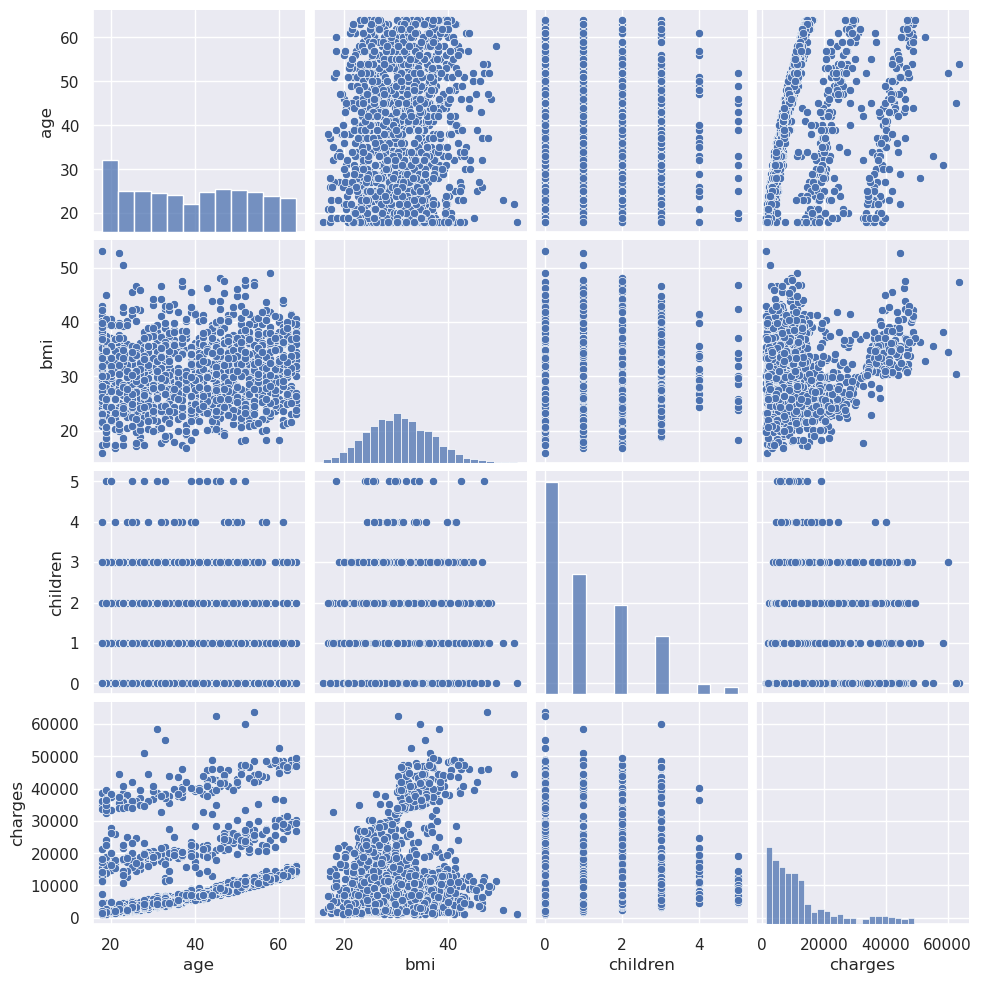

In [6]:
sns.pairplot(data=med_cost);

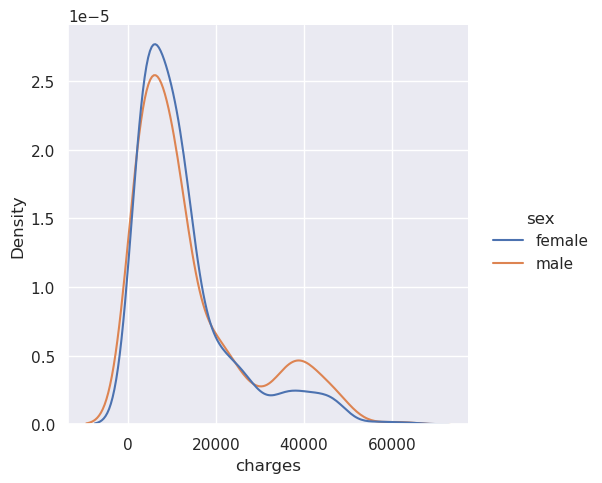

In [7]:
sns.displot(
    data=med_cost,
    x='charges',
    hue='sex',
    kind='kde'
);

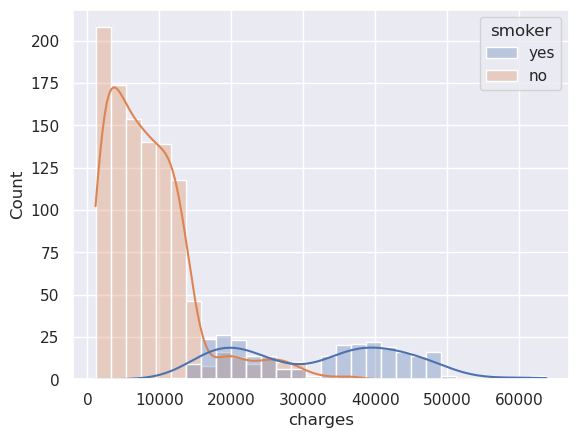

In [8]:
sns.histplot(data=med_cost, x='charges', hue='smoker', alpha=0.3, kde=True);

It appears that smokers are concentrated at the right part of the chart. This indicates the strong correlation between smoking and charges.

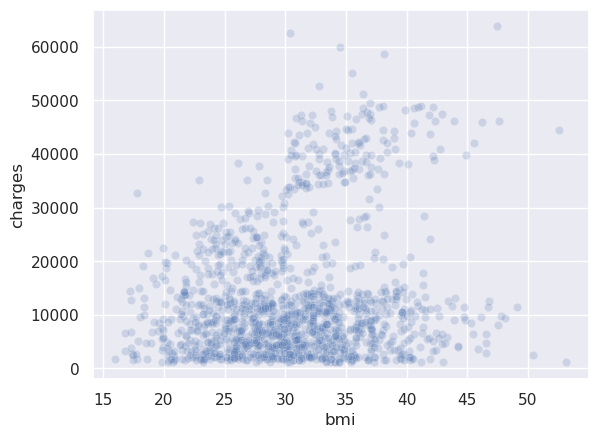

In [9]:
sns.scatterplot(data=med_cost, x='bmi', y='charges', alpha=0.2);

It also appears that there's some slight tendency for the costs to increase as the BMI increases. 

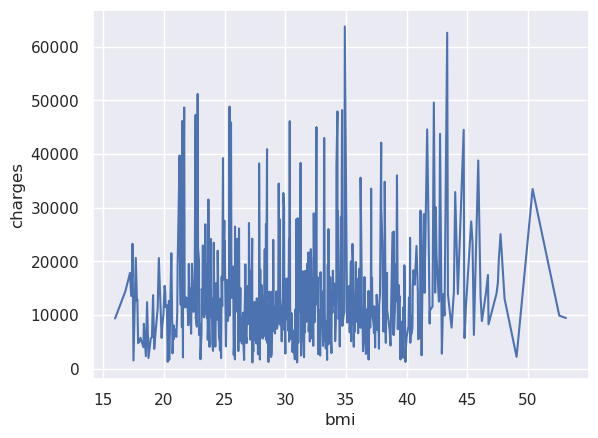

In [10]:
plt.xlabel('bmi')
sns.lineplot(x=med_cost['bmi'].unique(), y=med_cost.groupby('bmi')['charges'].mean());

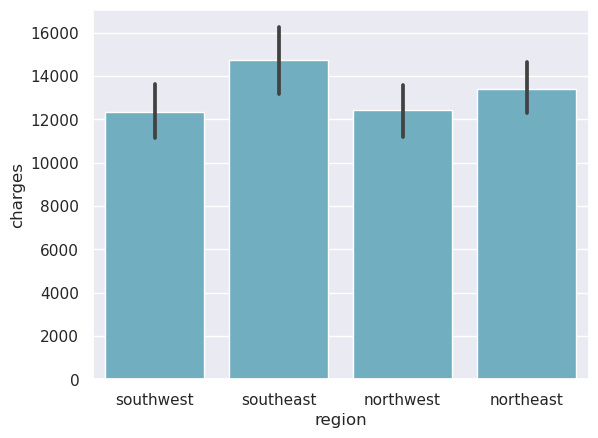

In [11]:
sns.barplot(data=med_cost, x='region', y='charges', color=sns.color_palette()[9]);

It doesn't appear to be any significant differences in costs between different regions.

### 2.2. Multivariate Exploration

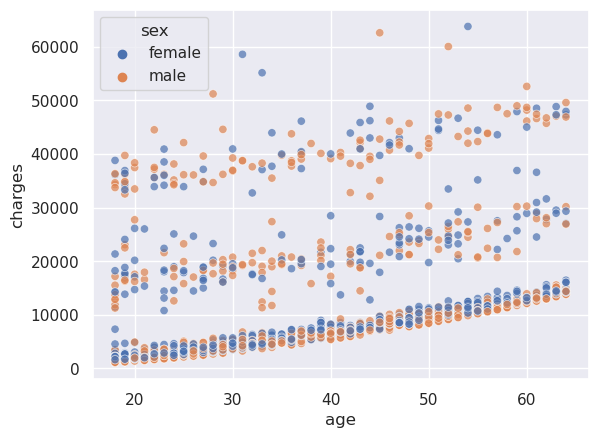

In [12]:
sns.scatterplot(data=med_cost, x='age', y='charges', hue='sex', alpha=0.7);

There appears to be an obvious, yet not-so-strong relation between age and costs. For the gender, there doesn't appear to be a clear pattern at this point.

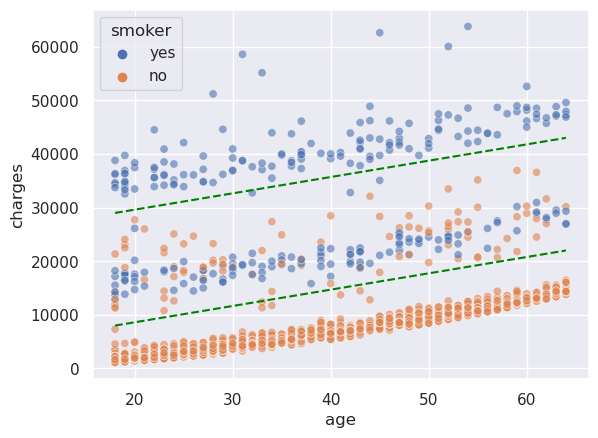

In [13]:
plt.subplot()
sns.scatterplot(data=med_cost, x='age', y='charges', hue='smoker', alpha=0.6)
plt.subplot()
plt.plot([18, 64], [29000, 43000], '--', color='green')
plt.subplot()
plt.plot([18, 64], [8000, 22000], '--', color='green');

This chart combines the previous two observations around the impact of smoking and age on the insurance costs. We can observe that beneficiaries are partitioned into three groups:
- Low cost, essentially non-smokers
- Medium cost, mixed
- High cost, essentially smokers 

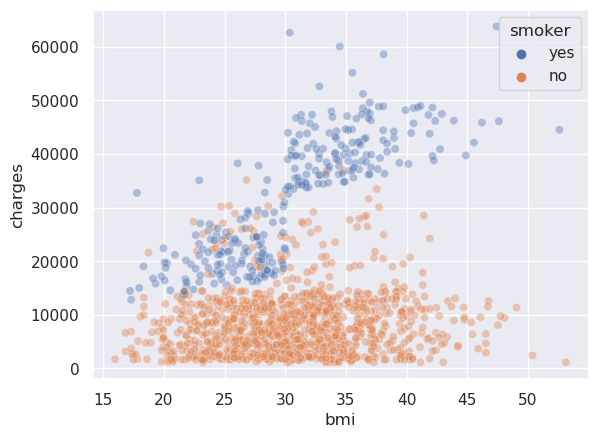

In [14]:
sns.scatterplot(data=med_cost, x='bmi', y='charges', hue='smoker', alpha=0.4);

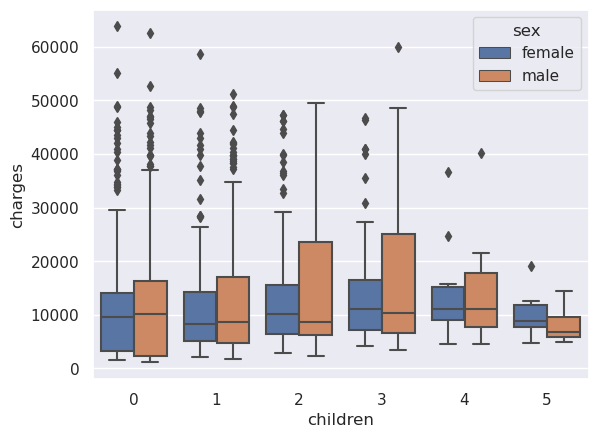

In [15]:
sns.boxplot(data=med_cost, x='children', y='charges', hue='sex');

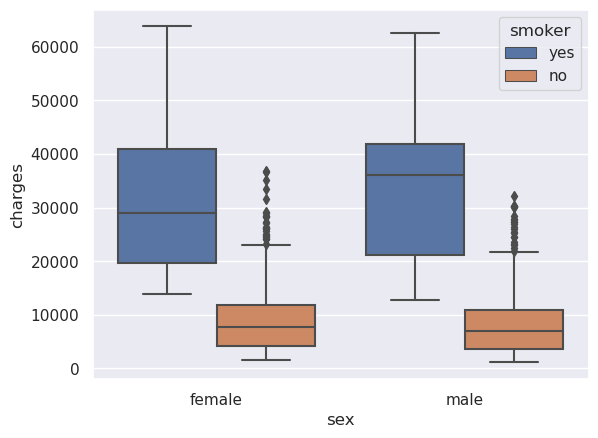

In [16]:
sns.boxplot(data=med_cost, x='sex', y='charges', hue='smoker');

Again, we can clearly observe the impact of smoking on the charges.

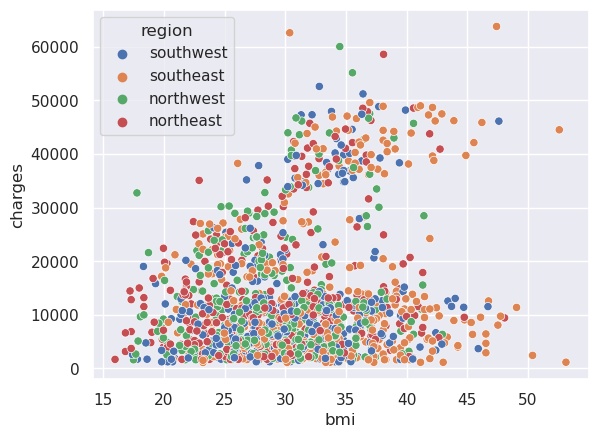

In [17]:
sns.scatterplot(data=med_cost, x='bmi', y='charges', hue='region');

## 3. Data Preprocessing

Now, we turn to data preprocessing. We will convert categorical features into numerical ones. For other transformations like feature scaling, we will only perform them when training a model that requires that kind of transformation, like when training an SVM.

In [18]:
med_cost['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [19]:
charges_raw = med_cost['charges']
features_raw = med_cost.drop('charges', axis=1)

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labEnc = LabelEncoder()
ohEnc = OneHotEncoder(sparse=False)

In [21]:
print('Before:', med_cost['smoker'].value_counts())
med_cost['smoker'] = labEnc.fit_transform(med_cost['smoker'])
print('After:', med_cost['smoker'].value_counts())

Before: no     1064
yes     274
Name: smoker, dtype: int64
After: 0    1064
1     274
Name: smoker, dtype: int64


In [22]:
print('Before:\n', med_cost['sex'].value_counts())
med_cost['sex'] = labEnc.fit_transform(med_cost['sex'])
print('After:\n', med_cost['sex'].value_counts())

Before:
 male      676
female    662
Name: sex, dtype: int64
After:
 1    676
0    662
Name: sex, dtype: int64


In [23]:
med_cost['region'].value_counts()
print('Before:\n', med_cost['region'].value_counts())
transformed_regions = pd.DataFrame(ohEnc.fit_transform(med_cost[['region']]))
med_cost = med_cost.join(transformed_regions)

Before:
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [24]:
med_cost.drop('region', axis=1, inplace=True)

In [25]:
med_cost.corr().style.background_gradient(cmap='GnBu')

,age,sex,bmi,children,smoker,charges,0,1,2,3
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
0,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
1,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
2,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
3,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [26]:
med_cost.sample(15)

,age,sex,bmi,children,smoker,charges,0,1,2,3
764,45,0,25.175,2,0,9095.06825,1.0,0.0,0.0,0.0
887,36,0,30.020,0,0,5272.17580,0.0,1.0,0.0,0.0
890,64,0,26.885,0,1,29330.98315,0.0,1.0,0.0,0.0
1293,46,1,25.745,3,0,9301.89355,0.0,1.0,0.0,0.0
259,19,1,31.920,0,1,33750.29180,0.0,1.0,0.0,0.0
1312,34,1,42.900,1,0,4536.25900,0.0,0.0,0.0,1.0
899,19,0,22.515,0,0,2117.33885,0.0,1.0,0.0,0.0
752,64,1,37.905,0,0,14210.53595,0.0,1.0,0.0,0.0
1286,28,0,17.290,0,0,3732.62510,1.0,0.0,0.0,0.0
707,49,1,28.690,3,0,10264.44210,0.0,1.0,0.0,0.0


In [27]:
med_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
 6   0         1338 non-null   float64
 7   1         1338 non-null   float64
 8   2         1338 non-null   float64
 9   3         1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


In [28]:
med_cost.describe()

,age,sex,bmi,children,smoker,charges,0,1,2,3
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [29]:
features_preprocessed = med_cost.drop('charges', axis=1)
features_preprocessed.sample(10)

,age,sex,bmi,children,smoker,0,1,2,3
368,44,1,32.015,2,0,0.0,1.0,0.0,0.0
40,24,0,26.600,0,0,1.0,0.0,0.0,0.0
274,25,1,27.550,0,0,0.0,1.0,0.0,0.0
1250,24,1,29.830,0,1,1.0,0.0,0.0,0.0
1303,43,1,27.800,0,1,0.0,0.0,0.0,1.0
93,35,1,34.770,2,0,0.0,1.0,0.0,0.0
442,18,1,43.010,0,0,0.0,0.0,1.0,0.0
727,29,0,21.755,1,1,1.0,0.0,0.0,0.0
161,18,0,36.850,0,1,0.0,0.0,1.0,0.0
763,27,1,26.030,0,0,1.0,0.0,0.0,0.0


In [30]:
features_preprocessed = np.array(features_preprocessed)
charges_preprocessed = np.array(charges_raw)

## 4. Model Selection and Training

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(features_preprocessed, charges_preprocessed, train_size=0.7)

In [32]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
''' 
    A convenience function to directly calculate the root mean square error
'''
def rmse(y_pred, y_true):
    return np.sqrt(np.abs(mse(y_pred=y_pred, y_true=y_true)))

In [34]:
svr_reg_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(C=550))
])
svr_reg_1 = svr_reg_1.fit(X_train, y_train)
svr_reg_1_pred = svr_reg_1.predict(X_test)
print(f'MAE:  {mae(y_test, svr_reg_1_pred)}')
print(f'RMSE: {rmse(y_test, svr_reg_1_pred)}')
print(f'R2:   {r2(y_test, svr_reg_1_pred)}')

MAE:  3759.7949499082474
RMSE: 8034.246034260728
R2:   0.595221435459133


In [35]:
svr_reg_2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', SVR(C=550))
])
svr_reg_2 = svr_reg_2.fit(X_train, y_train)
svr_reg_2_pred = svr_reg_2.predict(X_test)
print(f'MAE:  {mae(y_test, svr_reg_2_pred)}')
print(f'RMSE: {rmse(y_test, svr_reg_2_pred)}')
print(f'R2:   {r2(y_test, svr_reg_2_pred)}')

MAE:  3681.0287447058695
RMSE: 8072.514520616971
R2:   0.5913561930225439


In [36]:
dt_reg = Pipeline([
    ('model', DecisionTreeRegressor(max_depth=14, random_state=21))
])
dt_reg = dt_reg.fit(X_train, y_train)
dt_reg_pred = dt_reg.predict(X_test)
print(f'MAE:  {mae(y_test, dt_reg_pred)}')
print(f'RMSE: {rmse(y_test, dt_reg_pred)}')
print(f'R2:   {r2(y_test, dt_reg_pred)}')

MAE:  2951.4313019419574
RMSE: 6517.033326431925
R2:   0.7336656787600884


In [37]:
lin_reg = Pipeline([
    ('model', LinearRegression())
])
lin_reg = lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
print(f'MAE:  {mae(y_test, lin_reg_pred)}')
print(f'RMSE: {rmse(y_test, lin_reg_pred)}')
print(f'R2:   {r2(y_test, lin_reg_pred)}')

MAE:  3860.851593029624
RMSE: 5451.311083763374
R2:   0.8136500914262489


In [38]:
rf_reg = Pipeline([
    ('model', RandomForestRegressor(n_estimators=100, random_state=21))
])
rf_reg = rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)
print(f'MAE:  {mae(y_test, rf_reg_pred)}')
print(f'RMSE: {rmse(y_test, rf_reg_pred)}')
print(f'R2:   {r2(y_test, rf_reg_pred)}')

MAE:  2614.2650367174133
RMSE: 4347.2432272132755
R2:   0.8814899637800233


In [39]:
ada_reg = Pipeline([
    # ('model', AdaBoostRegressor(learning_rate=0.01, random_state=21))
    ('model', AdaBoostRegressor(n_estimators=20, learning_rate=0.01, random_state=21))
])
ada_reg = ada_reg.fit(X_train, y_train)
ada_reg_pred = ada_reg.predict(X_test)
print(f'MAE:  {mae(y_test, ada_reg_pred)}')
print(f'RMSE: {rmse(y_test, ada_reg_pred)}')
print(f'R2:   {r2(y_test, ada_reg_pred)}')

MAE:  2522.901847543391
RMSE: 4009.525381143499
R2:   0.8991877783154193


In [40]:
gb_reg = Pipeline([
    ('model', GradientBoostingRegressor(n_estimators=100, random_state=21))
])
gb_reg = gb_reg.fit(X_train, y_train)
gb_reg_pred = gb_reg.predict(X_test)
print(f'MAE:  {mae(y_test, gb_reg_pred)}')
print(f'RMSE: {rmse(y_test, gb_reg_pred)}')
print(f'R2:   {r2(y_test, gb_reg_pred)}')

MAE:  2256.440417064992
RMSE: 3761.687618531324
R2:   0.9112654590230409


At this point, the most promising models seem to be:
- Gradient Boosting
- AdaBoost
- Random Forest
- Decision Tree

## 5. Hyperparameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [42]:
def get_best_estimator(model, param_grid):
    grid_search = GridSearchCV(
        model,
        param_grid,
        scoring='neg_mean_squared_error',
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [43]:
param_grid = [
    {'n_estimators': list(range(88, 112, 2))},
    {'max_features': list(range(5, 8))},
    {'random_state': [21]}
]
gb_reg2 = get_best_estimator(GradientBoostingRegressor(), param_grid)
gb_reg2_pred = gb_reg2.predict(X_test)
print(f'MAE:  {mae(y_test, gb_reg2_pred)}')
print(f'RMSE: {rmse(y_test, gb_reg2_pred)}')
print(f'R2:   {r2(y_test, gb_reg2_pred)}')

MAE:  2231.8002676411747
RMSE: 3742.6834378849335
R2:   0.9121597744070062


In [44]:
param_grid = [
    {'n_estimators': list(range(88, 112, 1))+[4, 16, 40, 130, 160, 250]},
    {'learning_rate': [0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.1, 0.001]},
    {'random_state': [21]}
]
ada_reg2 = get_best_estimator(AdaBoostRegressor(), param_grid)
ada_reg2_pred = ada_reg2.predict(X_test)
print(f'MAE:  {mae(y_test, ada_reg2_pred)}')
print(f'RMSE: {rmse(y_test, ada_reg2_pred)}')
print(f'R2:   {r2(y_test, ada_reg2_pred)}')

MAE:  2560.913590439465
RMSE: 3985.1739891773095
R2:   0.9004086026582108


In [45]:
param_grid = [
    {'n_estimators': list(range(88, 112, 2))+[10, 24, 40, 140, 160, 250]},
    {'max_depth': list(range(2, 20, 2))},
    {'random_state': [21]}
]
rf_reg2 = get_best_estimator(RandomForestRegressor(), param_grid)
rf_reg2_pred = rf_reg2.predict(X_test)
print(f'MAE:  {mae(y_test, rf_reg2_pred)}')
print(f'RMSE: {rmse(y_test, rf_reg2_pred)}')
print(f'R2:   {r2(y_test, rf_reg2_pred)}')

MAE:  2276.116700169864
RMSE: 3755.7471965977775
R2:   0.9115454952487575


In [46]:
param_grid = [
    {'max_features': list(range(4, 8))},
    {'max_depth': list(range(6, 25, 1))},
    {'max_leaf_nodes': [4, 8, 15, 20, 22, 35, 37, 50]},
    {'random_state': [21]}
]
dt_reg2 = get_best_estimator(DecisionTreeRegressor(), param_grid)
dt_reg2_pred = dt_reg2.predict(X_test)
print(f'MAE:  {mae(y_test, dt_reg2_pred)}')
print(f'RMSE: {rmse(y_test, dt_reg2_pred)}')
print(f'R2:   {r2(y_test, dt_reg2_pred)}')

MAE:  2623.072321813818
RMSE: 4050.391585715941
R2:   0.897122292940506


In [47]:
gb_reg2

GradientBoostingRegressor(n_estimators=88)

In [48]:
rf_reg2

RandomForestRegressor(max_depth=4)

Seems like we can still do further tuning to the Gradient Boost model. Its best value was the minimum value set in the gradient search! We will repeat the search with the upper bound set to 88 this time.

The Random Forest model also seems to be doing great, but it also seems like there isn't much we can do to further improve it!

In [49]:
param_grid = [
    {'n_estimators': list(range(20, 88+2, 2))},
    {'max_features': list(range(5, 8))},
    {'random_state': [21]}
]
gb_reg3 = get_best_estimator(GradientBoostingRegressor(), param_grid)
gb_reg3_pred = gb_reg3.predict(X_test)
print(f'MAE:  {mae(y_test, gb_reg3_pred)}')
print(f'RMSE: {rmse(y_test, gb_reg3_pred)}')
print(f'R2:   {r2(y_test, gb_reg3_pred)}')

MAE:  2253.650916530421
RMSE: 3680.0999668467034
R2:   0.9150728629585837


In [50]:
gb_reg3

GradientBoostingRegressor(n_estimators=38)

This time the performance is nearly the same! The latter model has a slightly higher r2-score, so we will go with it.

#### Final Model Evaluation

In [54]:
print(f'Training score: {gb_reg3.score(X_train, y_train)}')
print(f'Testing score:  {gb_reg3.score(X_test, y_test)}')

Training score: 0.8578742946151737
Testing score:  0.9150728629585837


The testing score is slightly higher than the training score. This might indicate some underfitting.

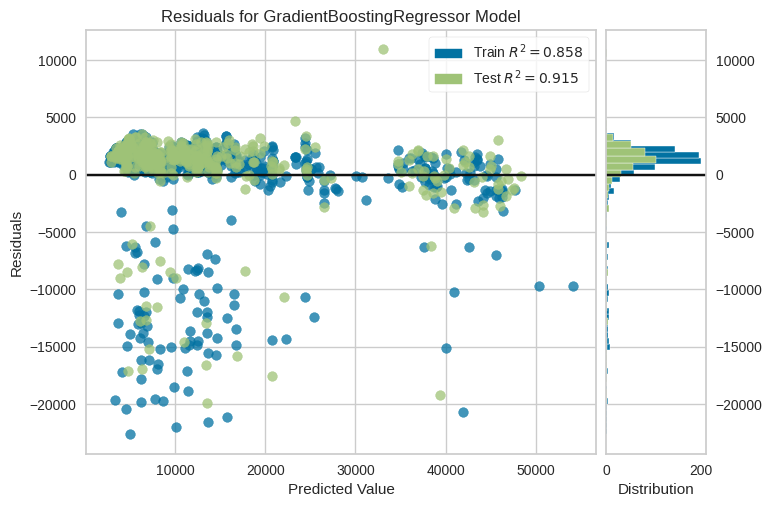

In [56]:
from yellowbrick.regressor import residuals_plot
residuals_plot(gb_reg3, X_train, y_train, X_test, y_test);

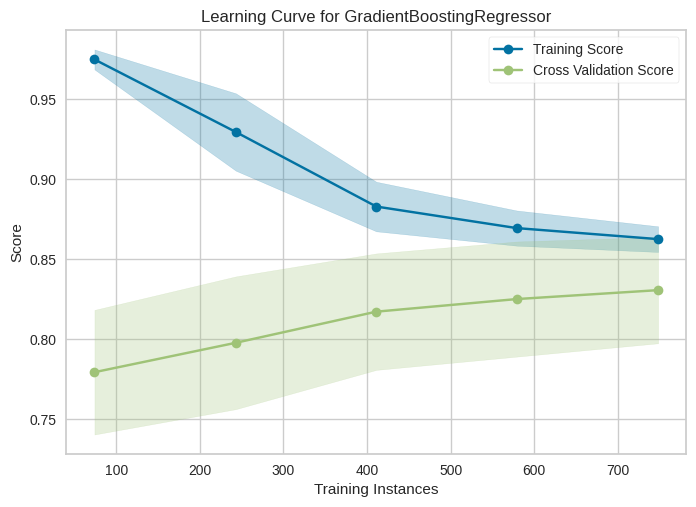

In [58]:
from yellowbrick.model_selection import LearningCurve
learning_curve = LearningCurve(gb_reg3, scoring='r2')
learning_curve.fit(X_train, y_train)
learning_curve.show();

#### Saving the Model

In [61]:
import pickle
pickle.dump(gb_reg3, open('final_model.sav', 'wb'))